## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

def build_mlp(input_shape, out_unit = 10, hidden_unit = [512, 256, 128], drop_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit_num in enumerate(hidden_unit):
        if i == 0:
            x = keras.layers.Dense(units = unit_num, activation = 'relu', 
                                   name = 'hidden_'+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units = unit_num, activation = 'relu',
                                   name = 'hidden_'+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out_layer = keras.layers.Dense(out_unit, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out_layer])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 128
DROP_RATIO = [0.1, 0.2, 0.3, 0.4, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, ratio in enumerate(DROP_RATIO):
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], drop_ratio = ratio)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    model.fit(x_train, y_train, epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    exp_tag = 'exp_' + str(ratio)
    results[exp_tag] = {
        'train-loss': train_loss,
        'val-loss': val_loss,
        'train_accuracy': train_acc,
        'val_accuracy': val_acc
    }

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 40s 808us/step - loss: 1.9673 - acc: 0.2806 - val_loss: 1.7745 - val_acc: 0.3640
Epoch 2/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7739 - acc: 0.3627 - val_loss: 1.6478 - val_acc: 0.4113
Epoch 3/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7019 - acc: 0.3877 - val_loss: 1.6097 - val_acc: 0.4265
Epoch 4/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.6558 - acc: 0.4036 - val_loss: 1.5737 - val_acc: 0.4413
Epoch 5/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.6222 - acc: 0.4168 - val_loss: 1.5577 - val_acc: 0.4487
Epoch 6/50
50000/500

50000/50000 [==============================] - 16s 326us/step - loss: 1.8602 - acc: 0.3226 - val_loss: 1.7495 - val_acc: 0.3817
Epoch 3/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.7937 - acc: 0.3477 - val_loss: 1.7224 - val_acc: 0.3844
Epoch 4/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.7668 - acc: 0.3582 - val_loss: 1.6708 - val_acc: 0.4004
Epoch 5/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.7423 - acc: 0.3685 - val_loss: 1.6566 - val_acc: 0.4133
Epoch 6/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.7156 - acc: 0.3757 - val_loss: 1.6240 - val_acc: 0.4271
Epoch 7/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.6908 - acc: 0.3870 - val_loss: 1.5890 - val_acc: 0.4388
Epoch 8/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.6789 - acc: 0.3927 - val_loss: 1.6193 - val_acc: 0.4239
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 19s 370us/step - loss: 1.7731 - acc: 0.3583 - val_loss: 1.6867 - val_acc: 0.3977
Epoch 11/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.7566 - acc: 0.3624 - val_loss: 1.6861 - val_acc: 0.4098
Epoch 12/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.7467 - acc: 0.3692 - val_loss: 1.6714 - val_acc: 0.4185
Epoch 13/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.7368 - acc: 0.3693 - val_loss: 1.6856 - val_acc: 0.4114
Epoch 14/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.7314 - acc: 0.3730 - val_loss: 1.6311 - val_acc: 0.4331
Epoch 15/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.7279 - acc: 0.3746 - val_loss: 1.6342 - val_acc: 0.4205
Epoch 16/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.7126 - acc: 0.3837 - val_loss: 1.6537 - val_acc: 0.4239
Epoch 17/50
50000/50000 [=======

50000/50000 [==============================] - 18s 352us/step - loss: 1.9011 - acc: 0.2914 - val_loss: 1.9304 - val_acc: 0.3148
Epoch 19/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.8981 - acc: 0.2934 - val_loss: 1.9096 - val_acc: 0.3288
Epoch 20/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.8953 - acc: 0.2943 - val_loss: 1.8745 - val_acc: 0.3233
Epoch 21/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.8932 - acc: 0.2963 - val_loss: 1.8470 - val_acc: 0.3495
Epoch 22/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.8928 - acc: 0.2931 - val_loss: 1.9391 - val_acc: 0.3052
Epoch 23/50
50000/50000 [==============================] - 16s 330us/step - loss: 1.8843 - acc: 0.2994 - val_loss: 1.8794 - val_acc: 0.3330
Epoch 24/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.8809 - acc: 0.3012 - val_loss: 1.9115 - val_acc: 0.3189
Epoch 25/50
50000/50000 [=======

50000/50000 [==============================] - 16s 317us/step - loss: 1.9953 - acc: 0.2384 - val_loss: 2.0202 - val_acc: 0.2450
Epoch 27/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.9904 - acc: 0.2422 - val_loss: 1.9993 - val_acc: 0.2640
Epoch 28/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.9906 - acc: 0.2384 - val_loss: 2.0490 - val_acc: 0.2471
Epoch 29/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.9870 - acc: 0.2395 - val_loss: 2.0562 - val_acc: 0.2358
Epoch 30/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.9898 - acc: 0.2395 - val_loss: 2.0303 - val_acc: 0.2362
Epoch 31/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.9874 - acc: 0.2427 - val_loss: 2.0188 - val_acc: 0.2536
Epoch 32/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.9875 - acc: 0.2421 - val_loss: 1.9926 - val_acc: 0.2834
Epoch 33/50
50000/50000 [=======

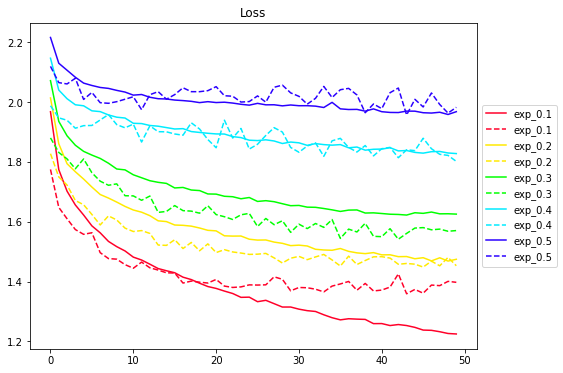

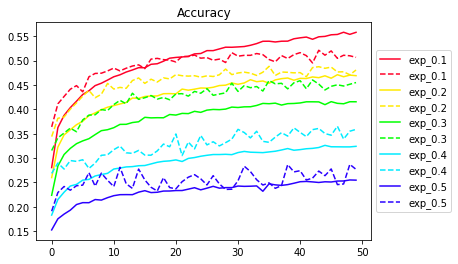

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_num = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_map = [cm(1.*i/color_num) for i in range(color_num)]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label = cond, color = color_map[i])
plt.title('Loss')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_accuracy'])), results[cond]['train_accuracy'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '--', label = cond, color = color_map[i])
plt.title('Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
